In [1]:
import re

In [3]:
# feature selection

folds_raw = ["""[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]		train's QWK: 0.220265	valid's QWK: 0.208446
[50]		train's QWK: 0.665386	valid's QWK: 0.662639
[75]		train's QWK: 0.716286	valid's QWK: 0.705951
[100]	train's QWK: 0.752775	valid's QWK: 0.74284
[125]	train's QWK: 0.773893	valid's QWK: 0.7605
[150]	train's QWK: 0.793284	valid's QWK: 0.773169
[175]	train's QWK: 0.807843	valid's QWK: 0.781234
[200]	train's QWK: 0.816081	valid's QWK: 0.795243
[225]	train's QWK: 0.823084	valid's QWK: 0.804197
[250]	train's QWK: 0.826407	valid's QWK: 0.810291
[275]	train's QWK: 0.828855	valid's QWK: 0.812315
[300]	train's QWK: 0.831284	valid's QWK: 0.815446
[325]	train's QWK: 0.83316		valid's QWK: 0.818442
[350]	train's QWK: 0.835148	valid's QWK: 0.821333
[375]	train's QWK: 0.836698	valid's QWK: 0.82202
[400]	train's QWK: 0.837828	valid's QWK: 0.822508
[425]	train's QWK: 0.838923	valid's QWK: 0.823394
[450]	train's QWK: 0.840105	valid's QWK: 0.826037
[475]	train's QWK: 0.840825	valid's QWK: 0.827511
[500]	train's QWK: 0.841641	valid's QWK: 0.827768
[525]	train's QWK: 0.843016	valid's QWK: 0.828214
[550]	train's QWK: 0.843917	valid's QWK: 0.829237
[575]	train's QWK: 0.844963	valid's QWK: 0.829662
[600]	train's QWK: 0.84546		valid's QWK: 0.830338
[625]	train's QWK: 0.845651	valid's QWK: 0.830148
[650]	train's QWK: 0.846468	valid's QWK: 0.830412
[675]	train's QWK: 0.847026	valid's QWK: 0.831179
[700]	train's QWK: 0.847412	valid's QWK: 0.830843
Evaluated only: QWK""",

"""
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]		train's QWK: 0.234465	valid's QWK: 0.217869
[50]		train's QWK: 0.662717	valid's QWK: 0.647863
[75]		train's QWK: 0.718624	valid's QWK: 0.706513
[100]	train's QWK: 0.756401	valid's QWK: 0.749783
[125]	train's QWK: 0.774953	valid's QWK: 0.768223
[150]	train's QWK: 0.79427		valid's QWK: 0.788119
[175]	train's QWK: 0.80783		valid's QWK: 0.800499
[200]	train's QWK: 0.817161	valid's QWK: 0.809554
[225]	train's QWK: 0.823245	valid's QWK: 0.817534
[250]	train's QWK: 0.826155	valid's QWK: 0.821567
[275]	train's QWK: 0.829018	valid's QWK: 0.824588
[300]	train's QWK: 0.831214	valid's QWK: 0.826424
[325]	train's QWK: 0.833442	valid's QWK: 0.830304
[350]	train's QWK: 0.835624	valid's QWK: 0.831351
[375]	train's QWK: 0.836729	valid's QWK: 0.832745
[400]	train's QWK: 0.837719	valid's QWK: 0.833419
[425]	train's QWK: 0.839171	valid's QWK: 0.832341
[450]	train's QWK: 0.840757	valid's QWK: 0.834363
[475]	train's QWK: 0.841516	valid's QWK: 0.834366
[500]	train's QWK: 0.84226		valid's QWK: 0.835233
[525]	train's QWK: 0.843185	valid's QWK: 0.835745
[550]	train's QWK: 0.843803	valid's QWK: 0.836556
[575]	train's QWK: 0.844673	valid's QWK: 0.837205
[600]	train's QWK: 0.845878	valid's QWK: 0.837241
[625]	train's QWK: 0.846529	valid's QWK: 0.836786
[650]	train's QWK: 0.847039	valid's QWK: 0.836902
[675]	train's QWK: 0.847819	valid's QWK: 0.837248
[700]	train's QWK: 0.848263	valid's QWK: 0.837475
Did not meet early stopping. Best iteration is:""",

"""[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]		train's QWK: 0.230516	valid's QWK: 0.224394
[50]		train's QWK: 0.668502	valid's QWK: 0.647248
[75]		train's QWK: 0.716737	valid's QWK: 0.696878
[100]	train's QWK: 0.755251	valid's QWK: 0.740166
[125]	train's QWK: 0.775644	valid's QWK: 0.758367
[150]	train's QWK: 0.790946	valid's QWK: 0.775757
[175]	train's QWK: 0.805959	valid's QWK: 0.789586
[200]	train's QWK: 0.816501	valid's QWK: 0.797141
[225]	train's QWK: 0.82396		valid's QWK: 0.804175
[250]	train's QWK: 0.828985	valid's QWK: 0.807318
[275]	train's QWK: 0.831663	valid's QWK: 0.809427
[300]	train's QWK: 0.833093	valid's QWK: 0.81208
[325]	train's QWK: 0.83458		valid's QWK: 0.814249
[350]	train's QWK: 0.836737	valid's QWK: 0.816071
[375]	train's QWK: 0.838022	valid's QWK: 0.817635
[400]	train's QWK: 0.839519	valid's QWK: 0.817737
[425]	train's QWK: 0.841296	valid's QWK: 0.818691
[450]	train's QWK: 0.842209	valid's QWK: 0.819546
[475]	train's QWK: 0.843184	valid's QWK: 0.820256
[500]	train's QWK: 0.84411		valid's QWK: 0.821154
[525]	train's QWK: 0.845074	valid's QWK: 0.822548
[550]	train's QWK: 0.846078	valid's QWK: 0.822775
[575]	train's QWK: 0.846166	valid's QWK: 0.823457
[600]	train's QWK: 0.847184	valid's QWK: 0.823112
[625]	train's QWK: 0.847606	valid's QWK: 0.824076
[650]	train's QWK: 0.848574	valid's QWK: 0.824717
[675]	train's QWK: 0.849291	valid's QWK: 0.825104
[700]	train's QWK: 0.849979	valid's QWK: 0.825438""",

"""[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]		train's QWK: 0.231824	valid's QWK: 0.228194
[50]		train's QWK: 0.667568	valid's QWK: 0.666908
[75]		train's QWK: 0.715992	valid's QWK: 0.720596
[100]	train's QWK: 0.755459	valid's QWK: 0.754418
[125]	train's QWK: 0.772968	valid's QWK: 0.772231
[150]	train's QWK: 0.787776	valid's QWK: 0.788392
[175]	train's QWK: 0.80274		valid's QWK: 0.796664
[200]	train's QWK: 0.813235	valid's QWK: 0.807236
[225]	train's QWK: 0.819135	valid's QWK: 0.816295
[250]	train's QWK: 0.823797	valid's QWK: 0.821797
[275]	train's QWK: 0.827189	valid's QWK: 0.822206
[300]	train's QWK: 0.829672	valid's QWK: 0.825574
[325]	train's QWK: 0.832893	valid's QWK: 0.826775
[350]	train's QWK: 0.834734	valid's QWK: 0.827478
[375]	train's QWK: 0.83735		valid's QWK: 0.828317
[400]	train's QWK: 0.838215	valid's QWK: 0.828844
[425]	train's QWK: 0.839757	valid's QWK: 0.831893
[450]	train's QWK: 0.841414	valid's QWK: 0.832713
[475]	train's QWK: 0.84262		valid's QWK: 0.833149
[500]	train's QWK: 0.843725	valid's QWK: 0.833315
[525]	train's QWK: 0.844809	valid's QWK: 0.833501
[550]	train's QWK: 0.845395	valid's QWK: 0.83418
[575]	train's QWK: 0.846097	valid's QWK: 0.834179
[600]	train's QWK: 0.846779	valid's QWK: 0.834498
[625]	train's QWK: 0.847033	valid's QWK: 0.834796
[650]	train's QWK: 0.847927	valid's QWK: 0.834585
[675]	train's QWK: 0.848675	valid's QWK: 0.834761
[700]	train's QWK: 0.849665	valid's QWK: 0.834486
Did not meet early stopping. Best iteration is:""",

"""[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]		train's QWK: 0.248238	valid's QWK: 0.261975
[50]		train's QWK: 0.662414	valid's QWK: 0.680571
[75]		train's QWK: 0.714554	valid's QWK: 0.733872
[100]	train's QWK: 0.751738	valid's QWK: 0.763386
[125]	train's QWK: 0.771326	valid's QWK: 0.784007
[150]	train's QWK: 0.789045	valid's QWK: 0.801701
[175]	train's QWK: 0.803434	valid's QWK: 0.814807
[200]	train's QWK: 0.812147	valid's QWK: 0.822339
[225]	train's QWK: 0.820468	valid's QWK: 0.828396
[250]	train's QWK: 0.824715	valid's QWK: 0.831961
[275]	train's QWK: 0.827657	valid's QWK: 0.835394
[300]	train's QWK: 0.830085	valid's QWK: 0.836021
[325]	train's QWK: 0.832031	valid's QWK: 0.837173
[350]	train's QWK: 0.833523	valid's QWK: 0.837882
[375]	train's QWK: 0.835644	valid's QWK: 0.839404
[400]	train's QWK: 0.837094	valid's QWK: 0.839579
[425]	train's QWK: 0.838508	valid's QWK: 0.83934
[450]	train's QWK: 0.839665	valid's QWK: 0.839275
[475]	train's QWK: 0.840696	valid's QWK: 0.841237
[500]	train's QWK: 0.841787	valid's QWK: 0.842138
[525]	train's QWK: 0.842464	valid's QWK: 0.843135
[550]	train's QWK: 0.84363		valid's QWK: 0.843545
[575]	train's QWK: 0.844431	valid's QWK: 0.843635
[600]	train's QWK: 0.845278	valid's QWK: 0.843072
[625]	train's QWK: 0.846271	valid's QWK: 0.84377
Early stopping, best iteration is:"""
]

folds = []
for fold in folds_raw:
    structured_data = re.findall(r'\[(\d+)\]\s+train\'s QWK: ([\d\.]+)\s+valid\'s QWK: ([\d\.]+)', fold)
    structured_data = [(int(x[0]), float(x[1]), float(x[2])) for x in structured_data]
    print(len(structured_data))
    print(structured_data)
    folds.append(structured_data)

NameError: name 're' is not defined

In [80]:
# training
folds_raw = [
    """Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.247056	valid's QWK: 0.240997
[50]	train's QWK: 0.670285	valid's QWK: 0.682018
[75]	train's QWK: 0.719144	valid's QWK: 0.713078
[100]	train's QWK: 0.756759	valid's QWK: 0.748481
[125]	train's QWK: 0.777911	valid's QWK: 0.76578
[150]	train's QWK: 0.79677	valid's QWK: 0.780241
[175]	train's QWK: 0.809407	valid's QWK: 0.79708
[200]	train's QWK: 0.815922	valid's QWK: 0.805102
[225]	train's QWK: 0.822061	valid's QWK: 0.81414
[250]	train's QWK: 0.824726	valid's QWK: 0.818916
[275]	train's QWK: 0.827254	valid's QWK: 0.818786
[300]	train's QWK: 0.829309	valid's QWK: 0.823325
[325]	train's QWK: 0.831279	valid's QWK: 0.824922
[350]	train's QWK: 0.833371	valid's QWK: 0.827717
[375]	train's QWK: 0.834661	valid's QWK: 0.829346
[400]	train's QWK: 0.836126	valid's QWK: 0.831161
[425]	train's QWK: 0.837318	valid's QWK: 0.831885
[450]	train's QWK: 0.839088	valid's QWK: 0.832165
[475]	train's QWK: 0.840028	valid's QWK: 0.83328
[500]	train's QWK: 0.841126	valid's QWK: 0.833109
[525]	train's QWK: 0.842198	valid's QWK: 0.833005""",

"""[25]	train's QWK: 0.236643	valid's QWK: 0.210226
[50]	train's QWK: 0.66752	valid's QWK: 0.6857
[75]	train's QWK: 0.718225	valid's QWK: 0.714782
[100]	train's QWK: 0.757819	valid's QWK: 0.760912
[125]	train's QWK: 0.777184	valid's QWK: 0.773184
[150]	train's QWK: 0.794687	valid's QWK: 0.785137
[175]	train's QWK: 0.808445	valid's QWK: 0.796314
[200]	train's QWK: 0.816406	valid's QWK: 0.809355
[225]	train's QWK: 0.821363	valid's QWK: 0.816276
[250]	train's QWK: 0.825332	valid's QWK: 0.818654
[275]	train's QWK: 0.827305	valid's QWK: 0.820577
[300]	train's QWK: 0.830147	valid's QWK: 0.826741
[325]	train's QWK: 0.831639	valid's QWK: 0.826329
[350]	train's QWK: 0.833289	valid's QWK: 0.828668
[375]	train's QWK: 0.834825	valid's QWK: 0.830724
[400]	train's QWK: 0.835724	valid's QWK: 0.829964
[425]	train's QWK: 0.836864	valid's QWK: 0.831931
[450]	train's QWK: 0.837965	valid's QWK: 0.832637
[475]	train's QWK: 0.839431	valid's QWK: 0.833167
[500]	train's QWK: 0.840142	valid's QWK: 0.833868
[525]	train's QWK: 0.841019	valid's QWK: 0.835322
[550]	train's QWK: 0.841859	valid's QWK: 0.836393
[575]	train's QWK: 0.842306	valid's QWK: 0.837926
[600]	train's QWK: 0.84339	valid's QWK: 0.83824
[625]	train's QWK: 0.844032	valid's QWK: 0.837271
[650]	train's QWK: 0.844306	valid's QWK: 0.837533
[675]	train's QWK: 0.844726	valid's QWK: 0.83876
[700]	train's QWK: 0.84556	valid's QWK: 0.839537""",

"""[25]	train's QWK: 0.238798	valid's QWK: 0.232826
[50]	train's QWK: 0.665033	valid's QWK: 0.671242
[75]	train's QWK: 0.717184	valid's QWK: 0.716445
[100]	train's QWK: 0.755827	valid's QWK: 0.748147
[125]	train's QWK: 0.77569	valid's QWK: 0.763334
[150]	train's QWK: 0.795221	valid's QWK: 0.774728
[175]	train's QWK: 0.80939	valid's QWK: 0.786442
[200]	train's QWK: 0.816649	valid's QWK: 0.801476
[225]	train's QWK: 0.822441	valid's QWK: 0.808438
[250]	train's QWK: 0.826625	valid's QWK: 0.808019
[275]	train's QWK: 0.829087	valid's QWK: 0.810335
[300]	train's QWK: 0.831511	valid's QWK: 0.813141
[325]	train's QWK: 0.832741	valid's QWK: 0.814117
[350]	train's QWK: 0.83417	valid's QWK: 0.815161
[375]	train's QWK: 0.836517	valid's QWK: 0.816432
[400]	train's QWK: 0.837476	valid's QWK: 0.81669
[425]	train's QWK: 0.838577	valid's QWK: 0.817267
[450]	train's QWK: 0.839558	valid's QWK: 0.820029
[475]	train's QWK: 0.840517	valid's QWK: 0.822731
[500]	train's QWK: 0.841444	valid's QWK: 0.823814
[525]	train's QWK: 0.842465	valid's QWK: 0.824411
[550]	train's QWK: 0.843742	valid's QWK: 0.82482
[575]	train's QWK: 0.844043	valid's QWK: 0.825336
[600]	train's QWK: 0.844827	valid's QWK: 0.828222
[625]	train's QWK: 0.845372	valid's QWK: 0.827731
[650]	train's QWK: 0.846459	valid's QWK: 0.827357
[675]	train's QWK: 0.847266	valid's QWK: 0.828547
[700]	train's QWK: 0.847502	valid's QWK: 0.829738""",

"""[25]	train's QWK: 0.180571	valid's QWK: 0.149901
[50]	train's QWK: 0.663987	valid's QWK: 0.661204
[75]	train's QWK: 0.719766	valid's QWK: 0.71207
[100]	train's QWK: 0.758007	valid's QWK: 0.75018
[125]	train's QWK: 0.774925	valid's QWK: 0.766452
[150]	train's QWK: 0.791928	valid's QWK: 0.785751
[175]	train's QWK: 0.804802	valid's QWK: 0.803007
[200]	train's QWK: 0.813712	valid's QWK: 0.812589
[225]	train's QWK: 0.820432	valid's QWK: 0.818284
[250]	train's QWK: 0.824353	valid's QWK: 0.823728
[275]	train's QWK: 0.826797	valid's QWK: 0.830441
[300]	train's QWK: 0.829334	valid's QWK: 0.832359
[325]	train's QWK: 0.83155	valid's QWK: 0.832495
[350]	train's QWK: 0.833123	valid's QWK: 0.832434
[375]	train's QWK: 0.834838	valid's QWK: 0.834632
[400]	train's QWK: 0.836655	valid's QWK: 0.833699
[425]	train's QWK: 0.837622	valid's QWK: 0.834778
[450]	train's QWK: 0.839286	valid's QWK: 0.8332""",

"""Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.213696	valid's QWK: 0.187679
[50]	train's QWK: 0.666046	valid's QWK: 0.669428
[75]	train's QWK: 0.722555	valid's QWK: 0.716657
[100]	train's QWK: 0.759573	valid's QWK: 0.754884
[125]	train's QWK: 0.778238	valid's QWK: 0.772809
[150]	train's QWK: 0.797088	valid's QWK: 0.784872
[175]	train's QWK: 0.807978	valid's QWK: 0.797538
[200]	train's QWK: 0.815815	valid's QWK: 0.806943
[225]	train's QWK: 0.821882	valid's QWK: 0.811301
[250]	train's QWK: 0.826343	valid's QWK: 0.817491
[275]	train's QWK: 0.828637	valid's QWK: 0.819524
[300]	train's QWK: 0.830861	valid's QWK: 0.824069
[325]	train's QWK: 0.832528	valid's QWK: 0.824835
[350]	train's QWK: 0.833947	valid's QWK: 0.827473
[375]	train's QWK: 0.835881	valid's QWK: 0.831894
[400]	train's QWK: 0.837485	valid's QWK: 0.831603
[425]	train's QWK: 0.838955	valid's QWK: 0.831873
[450]	train's QWK: 0.840611	valid's QWK: 0.834308
[475]	train's QWK: 0.841137	valid's QWK: 0.834457
[500]	train's QWK: 0.842249	valid's QWK: 0.832304
[525]	train's QWK: 0.843154	valid's QWK: 0.831887""",

"""[25]	train's QWK: 0.213748	valid's QWK: 0.210424
[50]	train's QWK: 0.67444	valid's QWK: 0.667046
[75]	train's QWK: 0.722224	valid's QWK: 0.724559
[100]	train's QWK: 0.757775	valid's QWK: 0.765908
[125]	train's QWK: 0.776103	valid's QWK: 0.778883
[150]	train's QWK: 0.792852	valid's QWK: 0.79117
[175]	train's QWK: 0.806701	valid's QWK: 0.811161
[200]	train's QWK: 0.81498	valid's QWK: 0.821826
[225]	train's QWK: 0.819986	valid's QWK: 0.826778
[250]	train's QWK: 0.824854	valid's QWK: 0.832661
[275]	train's QWK: 0.827182	valid's QWK: 0.831055
[300]	train's QWK: 0.82989	valid's QWK: 0.833279
[325]	train's QWK: 0.831388	valid's QWK: 0.83385
[350]	train's QWK: 0.832783	valid's QWK: 0.837597
[375]	train's QWK: 0.834392	valid's QWK: 0.836957
[400]	train's QWK: 0.835741	valid's QWK: 0.838842
[425]	train's QWK: 0.837073	valid's QWK: 0.841528
[450]	train's QWK: 0.838167	valid's QWK: 0.840809
[475]	train's QWK: 0.838737	valid's QWK: 0.843285
[500]	train's QWK: 0.839578	valid's QWK: 0.841958
[525]	train's QWK: 0.840466	valid's QWK: 0.841741""",

"""[25]	train's QWK: 0.246698	valid's QWK: 0.227928
[50]	train's QWK: 0.666918	valid's QWK: 0.657305
[75]	train's QWK: 0.715231	valid's QWK: 0.707422
[100]	train's QWK: 0.755067	valid's QWK: 0.745975
[125]	train's QWK: 0.776772	valid's QWK: 0.760397
[150]	train's QWK: 0.793371	valid's QWK: 0.775828
[175]	train's QWK: 0.807623	valid's QWK: 0.78686
[200]	train's QWK: 0.816464	valid's QWK: 0.798412
[225]	train's QWK: 0.822178	valid's QWK: 0.80117
[250]	train's QWK: 0.826046	valid's QWK: 0.804396
[275]	train's QWK: 0.82917	valid's QWK: 0.806372
[300]	train's QWK: 0.831096	valid's QWK: 0.80635
[325]	train's QWK: 0.833075	valid's QWK: 0.80889
[350]	train's QWK: 0.834901	valid's QWK: 0.810848
[375]	train's QWK: 0.836269	valid's QWK: 0.812875
[400]	train's QWK: 0.837935	valid's QWK: 0.816012
[425]	train's QWK: 0.839449	valid's QWK: 0.8172
[450]	train's QWK: 0.840383	valid's QWK: 0.817172
[475]	train's QWK: 0.841791	valid's QWK: 0.818359
[500]	train's QWK: 0.84263	valid's QWK: 0.820433
[525]	train's QWK: 0.843524	valid's QWK: 0.821644
[550]	train's QWK: 0.843873	valid's QWK: 0.820886
[575]	train's QWK: 0.844883	valid's QWK: 0.821839
[600]	train's QWK: 0.845491	valid's QWK: 0.822662
[625]	train's QWK: 0.846062	valid's QWK: 0.822466
[650]	train's QWK: 0.84649	valid's QWK: 0.822609
[675]	train's QWK: 0.847121	valid's QWK: 0.822196""",

"""[25]	train's QWK: 0.223768	valid's QWK: 0.246242
[50]	train's QWK: 0.671932	valid's QWK: 0.653457
[75]	train's QWK: 0.718871	valid's QWK: 0.700017
[100]	train's QWK: 0.756734	valid's QWK: 0.735749
[125]	train's QWK: 0.774072	valid's QWK: 0.766612
[150]	train's QWK: 0.792281	valid's QWK: 0.78745
[175]	train's QWK: 0.807943	valid's QWK: 0.803666
[200]	train's QWK: 0.817669	valid's QWK: 0.81485
[225]	train's QWK: 0.822251	valid's QWK: 0.816666
[250]	train's QWK: 0.826565	valid's QWK: 0.821249
[275]	train's QWK: 0.829332	valid's QWK: 0.824851
[300]	train's QWK: 0.83174	valid's QWK: 0.825733
[325]	train's QWK: 0.833178	valid's QWK: 0.827058
[350]	train's QWK: 0.834325	valid's QWK: 0.828027
[375]	train's QWK: 0.836438	valid's QWK: 0.827667
[400]	train's QWK: 0.837576	valid's QWK: 0.82961
[425]	train's QWK: 0.839014	valid's QWK: 0.828212
[450]	train's QWK: 0.84021	valid's QWK: 0.82811""",

"""[25]	train's QWK: 0.197585	valid's QWK: 0.189905
[50]	train's QWK: 0.671423	valid's QWK: 0.65215
[75]	train's QWK: 0.721218	valid's QWK: 0.694222
[100]	train's QWK: 0.758559	valid's QWK: 0.74751
[125]	train's QWK: 0.777133	valid's QWK: 0.764693
[150]	train's QWK: 0.79421	valid's QWK: 0.779455
[175]	train's QWK: 0.808339	valid's QWK: 0.789502
[200]	train's QWK: 0.816112	valid's QWK: 0.797866
[225]	train's QWK: 0.821608	valid's QWK: 0.802258
[250]	train's QWK: 0.826643	valid's QWK: 0.807377
[275]	train's QWK: 0.829371	valid's QWK: 0.806616
[300]	train's QWK: 0.831563	valid's QWK: 0.81104
[325]	train's QWK: 0.833506	valid's QWK: 0.811672
[350]	train's QWK: 0.834782	valid's QWK: 0.814241
[375]	train's QWK: 0.836712	valid's QWK: 0.813457
[400]	train's QWK: 0.837866	valid's QWK: 0.814202
[425]	train's QWK: 0.839109	valid's QWK: 0.815675
[450]	train's QWK: 0.84011	valid's QWK: 0.816926
[475]	train's QWK: 0.841693	valid's QWK: 0.819147
[500]	train's QWK: 0.842555	valid's QWK: 0.823468
[525]	train's QWK: 0.843341	valid's QWK: 0.823428
[550]	train's QWK: 0.8437	valid's QWK: 0.826823
[575]	train's QWK: 0.844326	valid's QWK: 0.826651
[600]	train's QWK: 0.84456	valid's QWK: 0.82794
[625]	train's QWK: 0.845493	valid's QWK: 0.826791
[650]	train's QWK: 0.846339	valid's QWK: 0.827239""",

"""[25]	train's QWK: 0.224015	valid's QWK: 0.203118
[50]	train's QWK: 0.661142	valid's QWK: 0.649303
[75]	train's QWK: 0.712166	valid's QWK: 0.704174
[100]	train's QWK: 0.756122	valid's QWK: 0.753297
[125]	train's QWK: 0.775212	valid's QWK: 0.771178
[150]	train's QWK: 0.793513	valid's QWK: 0.79006
[175]	train's QWK: 0.808088	valid's QWK: 0.806011
[200]	train's QWK: 0.818135	valid's QWK: 0.809792
[225]	train's QWK: 0.823023	valid's QWK: 0.817353
[250]	train's QWK: 0.826931	valid's QWK: 0.826432
[275]	train's QWK: 0.829837	valid's QWK: 0.824386
[300]	train's QWK: 0.831995	valid's QWK: 0.825903
[325]	train's QWK: 0.833459	valid's QWK: 0.826262
[350]	train's QWK: 0.834902	valid's QWK: 0.826349
[375]	train's QWK: 0.835857	valid's QWK: 0.828211
[400]	train's QWK: 0.837566	valid's QWK: 0.827774
[425]	train's QWK: 0.838996	valid's QWK: 0.831721
[450]	train's QWK: 0.840068	valid's QWK: 0.830353
[475]	train's QWK: 0.840918	valid's QWK: 0.831455
[500]	train's QWK: 0.841924	valid's QWK: 0.832616
[525]	train's QWK: 0.842947	valid's QWK: 0.8316
[550]	train's QWK: 0.843488	valid's QWK: 0.832007""",

"""[25]	train's QWK: 0.225798	valid's QWK: 0.218703
[50]	train's QWK: 0.67198	valid's QWK: 0.674432
[75]	train's QWK: 0.717412	valid's QWK: 0.713891
[100]	train's QWK: 0.757632	valid's QWK: 0.746348
[125]	train's QWK: 0.777236	valid's QWK: 0.773739
[150]	train's QWK: 0.79394	valid's QWK: 0.787093
[175]	train's QWK: 0.80912	valid's QWK: 0.80445
[200]	train's QWK: 0.816279	valid's QWK: 0.814699
[225]	train's QWK: 0.822124	valid's QWK: 0.816483
[250]	train's QWK: 0.825723	valid's QWK: 0.821886
[275]	train's QWK: 0.829206	valid's QWK: 0.819574
[300]	train's QWK: 0.831978	valid's QWK: 0.823367
[325]	train's QWK: 0.833511	valid's QWK: 0.825048
[350]	train's QWK: 0.835025	valid's QWK: 0.827327
[375]	train's QWK: 0.836477	valid's QWK: 0.82803
[400]	train's QWK: 0.838411	valid's QWK: 0.830999
[425]	train's QWK: 0.839512	valid's QWK: 0.830203
[450]	train's QWK: 0.840612	valid's QWK: 0.832024
[475]	train's QWK: 0.841727	valid's QWK: 0.835057
[500]	train's QWK: 0.842052	valid's QWK: 0.835176
[525]	train's QWK: 0.842919	valid's QWK: 0.835181
[550]	train's QWK: 0.843988	valid's QWK: 0.834464
[575]	train's QWK: 0.84455	valid's QWK: 0.834728""",

"""[25]	train's QWK: 0.250778	valid's QWK: 0.225043
[50]	train's QWK: 0.662293	valid's QWK: 0.654728
[75]	train's QWK: 0.717417	valid's QWK: 0.719329
[100]	train's QWK: 0.755131	valid's QWK: 0.756115
[125]	train's QWK: 0.776867	valid's QWK: 0.769811
[150]	train's QWK: 0.794335	valid's QWK: 0.793039
[175]	train's QWK: 0.808848	valid's QWK: 0.809683
[200]	train's QWK: 0.816539	valid's QWK: 0.815139
[225]	train's QWK: 0.821442	valid's QWK: 0.823126
[250]	train's QWK: 0.825047	valid's QWK: 0.830755
[275]	train's QWK: 0.827979	valid's QWK: 0.831749
[300]	train's QWK: 0.830245	valid's QWK: 0.836055
[325]	train's QWK: 0.832604	valid's QWK: 0.838847
[350]	train's QWK: 0.834829	valid's QWK: 0.836205
[375]	train's QWK: 0.836281	valid's QWK: 0.835628
[400]	train's QWK: 0.837703	valid's QWK: 0.835897""",

"""[25]	train's QWK: 0.22569	valid's QWK: 0.233492
[50]	train's QWK: 0.660158	valid's QWK: 0.652018
[75]	train's QWK: 0.713342	valid's QWK: 0.726401
[100]	train's QWK: 0.753907	valid's QWK: 0.757436
[125]	train's QWK: 0.773186	valid's QWK: 0.780673
[150]	train's QWK: 0.790049	valid's QWK: 0.797019
[175]	train's QWK: 0.805343	valid's QWK: 0.808757
[200]	train's QWK: 0.814432	valid's QWK: 0.814668
[225]	train's QWK: 0.821513	valid's QWK: 0.817932
[250]	train's QWK: 0.8254	valid's QWK: 0.818239
[275]	train's QWK: 0.828867	valid's QWK: 0.82389
[300]	train's QWK: 0.831387	valid's QWK: 0.828217
[325]	train's QWK: 0.832759	valid's QWK: 0.827883
[350]	train's QWK: 0.834938	valid's QWK: 0.829186
[375]	train's QWK: 0.836222	valid's QWK: 0.829272
[400]	train's QWK: 0.837385	valid's QWK: 0.829038
[425]	train's QWK: 0.838564	valid's QWK: 0.83041
[450]	train's QWK: 0.839945	valid's QWK: 0.830207
[475]	train's QWK: 0.840811	valid's QWK: 0.831191
[500]	train's QWK: 0.841474	valid's QWK: 0.832795
[525]	train's QWK: 0.84218	valid's QWK: 0.835597
[550]	train's QWK: 0.842774	valid's QWK: 0.835997
[575]	train's QWK: 0.843832	valid's QWK: 0.83669
[600]	train's QWK: 0.844295	valid's QWK: 0.836113
[625]	train's QWK: 0.845109	valid's QWK: 0.836049""",

"""[25]	train's QWK: 0.195118	valid's QWK: 0.196046
[50]	train's QWK: 0.662875	valid's QWK: 0.676093
[75]	train's QWK: 0.718684	valid's QWK: 0.729329
[100]	train's QWK: 0.753395	valid's QWK: 0.766253
[125]	train's QWK: 0.771026	valid's QWK: 0.784808
[150]	train's QWK: 0.794051	valid's QWK: 0.807725
[175]	train's QWK: 0.806985	valid's QWK: 0.820094
[200]	train's QWK: 0.814665	valid's QWK: 0.826393
[225]	train's QWK: 0.821169	valid's QWK: 0.834479
[250]	train's QWK: 0.824425	valid's QWK: 0.837896
[275]	train's QWK: 0.826654	valid's QWK: 0.839157
[300]	train's QWK: 0.828408	valid's QWK: 0.840253
[325]	train's QWK: 0.831014	valid's QWK: 0.843085
[350]	train's QWK: 0.833049	valid's QWK: 0.845696
[375]	train's QWK: 0.834498	valid's QWK: 0.847534
[400]	train's QWK: 0.836212	valid's QWK: 0.847703
[425]	train's QWK: 0.837889	valid's QWK: 0.845902
[450]	train's QWK: 0.839128	valid's QWK: 0.846807""",

"""[25]	train's QWK: 0.247357	valid's QWK: 0.290641
[50]	train's QWK: 0.667043	valid's QWK: 0.688579
[75]	train's QWK: 0.720607	valid's QWK: 0.749491
[100]	train's QWK: 0.755379	valid's QWK: 0.785361
[125]	train's QWK: 0.774566	valid's QWK: 0.803226
[150]	train's QWK: 0.791007	valid's QWK: 0.81322
[175]	train's QWK: 0.805792	valid's QWK: 0.832081
[200]	train's QWK: 0.815112	valid's QWK: 0.839651
[225]	train's QWK: 0.821103	valid's QWK: 0.842116
[250]	train's QWK: 0.824986	valid's QWK: 0.844979
[275]	train's QWK: 0.827651	valid's QWK: 0.84519
[300]	train's QWK: 0.830098	valid's QWK: 0.843557
[325]	train's QWK: 0.832138	valid's QWK: 0.843983
[350]	train's QWK: 0.833224	valid's QWK: 0.845374""",


]


folds = []
for fold in folds_raw:
    structured_data = re.findall(r'\[(\d+)\]\s+train\'s QWK: ([\d\.]+)\s+valid\'s QWK: ([\d\.]+)', fold)
    structured_data = [(int(x[0]), float(x[1]), float(x[2])) for x in structured_data]
    # print(len(structured_data))
    # print(structured_data)
    folds.append(structured_data)

In [85]:
len(structured_data)

14

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


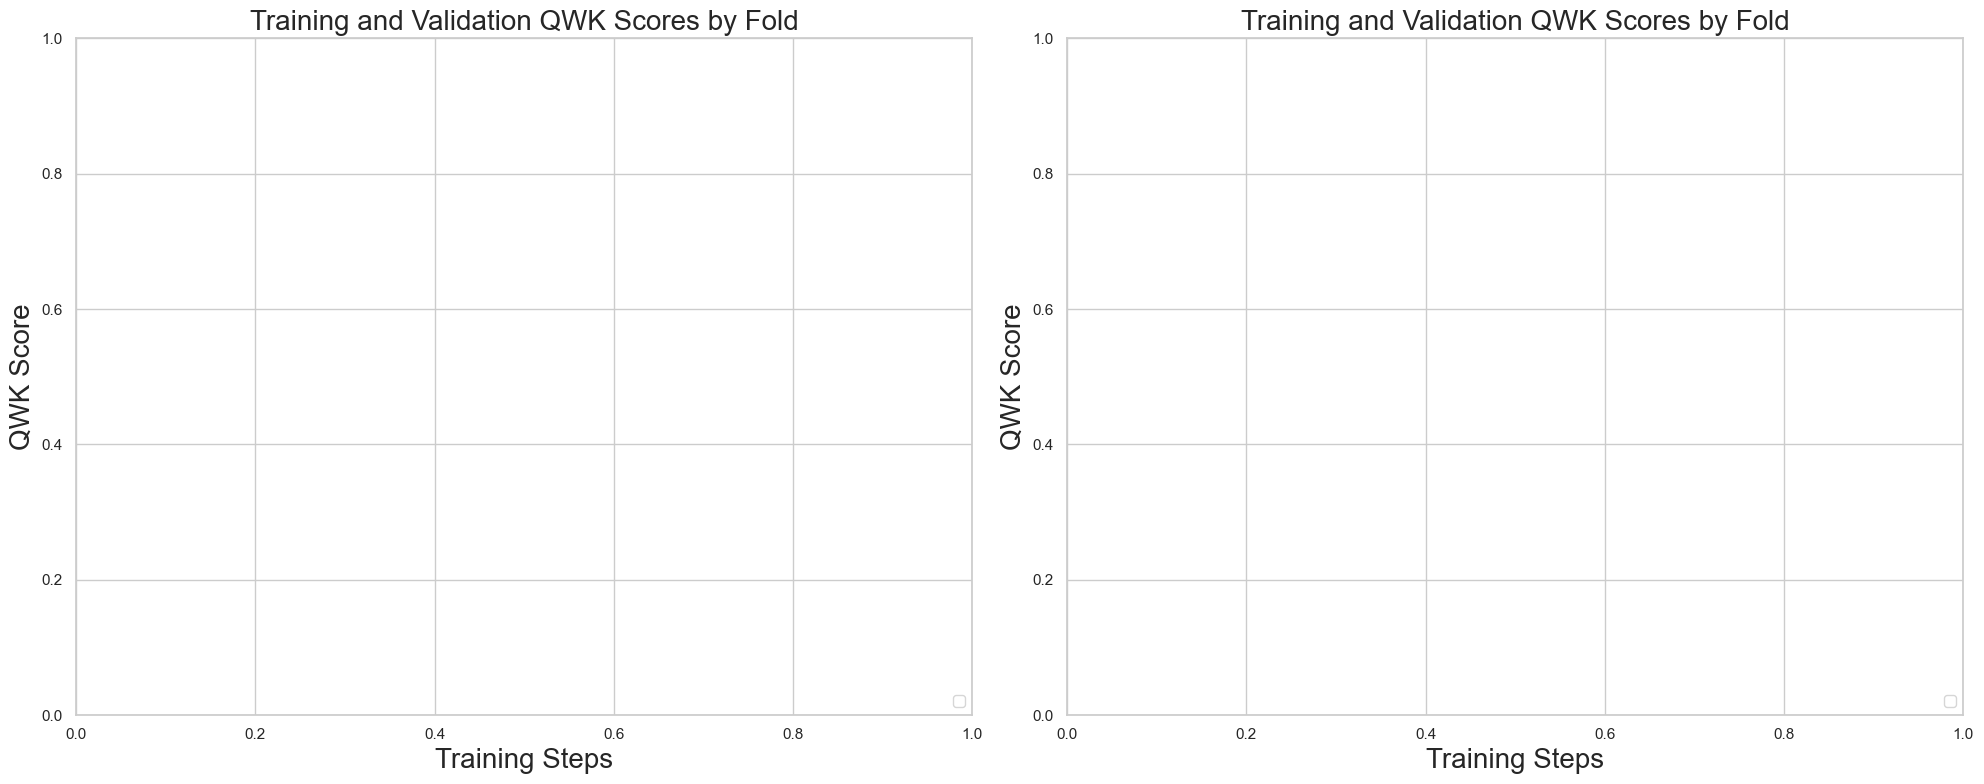

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



sns.set(style="whitegrid")
sns.set_palette("husl")

steps = sorted({x[0] for fold in folds for x in fold})
mean_train_scores = []
mean_valid_scores = []

for step in steps:
    train_scores = [x[1] for fold in folds for x in fold if x[0] == step]
    valid_scores = [x[2] for fold in folds for x in fold if x[0] == step]
    mean_train_scores.append(np.mean(train_scores))
    mean_valid_scores.append(np.mean(valid_scores))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for i, fold_data in enumerate(folds):
    steps1 = [x[0] for x in fold_data][5:]
    valid_scores = [x[2] for x in fold_data][5:]
    steps2 = [x[0] for x in fold_data][10:]
    train_scores = [x[1] for x in fold_data][10:]

    ax1.plot(steps2, train_scores, label=f'Train Fold {i+1}', marker='o', linestyle='-', linewidth=1, markersize=2)
    ax2.plot(steps1, valid_scores, label=f'Valid Fold {i+1}', marker='o', linestyle='-', linewidth=1, markersize=2)

    # ax1.axhline(y=mean_train_scores, color='black', linestyle='--', alpha=0.5)
    # ax2.axhline(y=mean_valid_scores, color='black', linestyle='--', alpha=0.5)

ax1.set_xlabel('Training Steps')
ax1.set_ylabel('QWK Score')
ax1.set_title('Training and Validation QWK Scores by Fold')
ax1.legend(loc='lower right')
ax1.title.set_size(20)
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)

ax2.set_xlabel('Training Steps')
ax2.set_ylabel('QWK Score')
ax2.set_title('Training and Validation QWK Scores by Fold')
ax2.legend(loc='lower right')
ax2.title.set_size(20)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
plt.tight_layout()
plt.show()

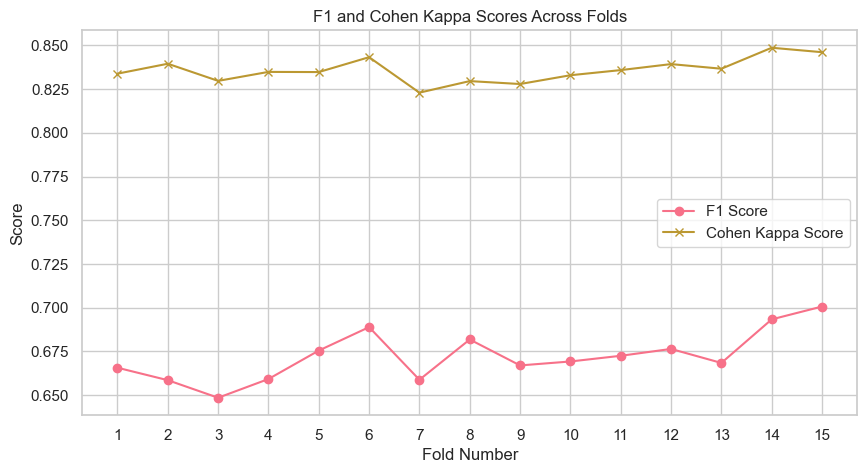

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set(style="whitegrid")
sns.set_palette("husl")

# Data from the provided scores
folds = list(range(1, 16))
f1_scores = [
    0.6656898252053052, 0.6585696538354773, 0.6485226054616815, 0.6592294903998616, 
    0.6754994171212293, 0.688910626319775, 0.6588099525321087, 0.6818435734012843, 
    0.6670081068555871, 0.6692662390571485, 0.6725217610497236, 0.6764379887685373, 
    0.6684276999654896, 0.6933445370230906, 0.7006859202053799
]
cohen_kappa_scores = [
    0.8338635955805945, 0.8395368193276226, 0.8297378143762042, 0.8348699877195793, 
    0.8347756661179455, 0.8432849229552105, 0.8230022922591955, 0.8296103234361079, 
    0.8279397528036562, 0.8329600711055782, 0.8359031266903478, 0.8393329453610469, 
    0.8366900456200381, 0.8486826063933657, 0.8461399583971114
]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(folds, f1_scores, marker='o', label='F1 Score')
plt.plot(folds, cohen_kappa_scores, marker='x', label='Cohen Kappa Score')
plt.title('F1 and Cohen Kappa Scores Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()